<h1>Distances</h1>
<p>In this notebook, we will use sktime for time series distance computation</p>
<h3>Preliminaries</h3>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sktime.datasets import load_macroeconomic
from sktime.distances import distance

<h2>Distances</h2>
The goal of a distance computation is to measure the similarity between the time series
'x' and 'y'. A distance function should take x and y as parameters and return a float
that is the computed distance between x and y. The value returned should be 0.0 when
the time series are the exact same, and a value greater than 0.0 that is a measure of
distance between them, when they are different.

Take the following two time series:

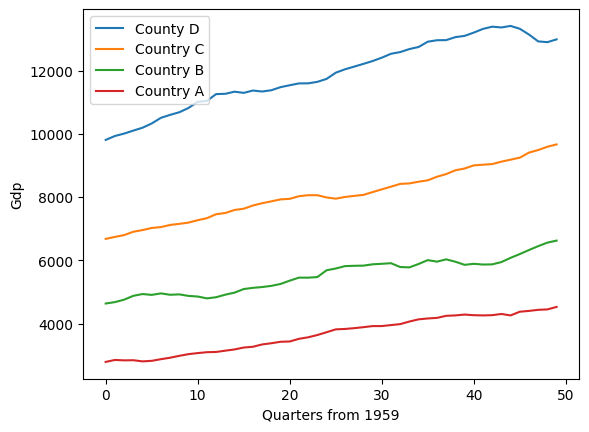

In [2]:
X = load_macroeconomic()
country_d, country_c, country_b, country_a = np.split(X["realgdp"].to_numpy()[3:], 4)

plt.plot(country_a, label="County D")
plt.plot(country_b, label="Country C")
plt.plot(country_c, label="Country B")
plt.plot(country_d, label="Country A")
plt.xlabel("Quarters from 1959")
plt.ylabel("Gdp")
plt.legend()

The above shows a made up scenario comparing the gdp growth of four countries (country
A, B, C and D) by quarter from 1959. If our task is to determine how different country
C is from our other countries one way to do this is to measure the distance between
each country.
<br>

How to use the distance module to perform tasks such as these, will now be outlined.

<h2>Distance module</h2>
To begin using the distance module we need at least two time series, x and y and they
must be numpy arrays. We've established the various time series we'll be using for this
example above as country_a, country_b, country_c and country_d. To compute the distance
between x and y we can use a euclidean distance as shown:

In [3]:
# Simple euclidean distance
distance(country_a, country_b, metric="euclidean")

27014.72129492244

Shown above taking the distance between country_a and country_b, returns a singular
float that represents their similarity (distance). We can do the same again but compare
country_d to country_a:

In [4]:
distance(country_a, country_d, metric="euclidean")

58340.14674572803

Now we can compare the result of the distance computation and we find that country_a is
closer to country_b than country_d (27014.7 < 58340.1).

We can further confirm this result by looking at the graph above and see the green line
 (country_b) is closer to the red line (country_a) than the orange line (country d).
<br>
<h3>Different metric parameters</h3>
Above we used the metric "euclidean". While euclidean distance is appropriate for simple
example such as the one above, it has been shown to be inadequate when we have larger
and more complex timeseries (particularly multivariate). While the merits of each
different distance won't be described here (see documentation for descriptions of each),
a large number of specialised time series distances have been implement to get a better
accuracy in distance computation. These are:
<br><br>
'euclidean', 'squared', 'dtw', 'ddtw', 'wdtw', 'wddtw', 'lcss', 'edr', 'erp'
<br><br>

All of the above can be used as a metric parameter. This will now be demonstrated:

In [5]:
print("Euclidean distance: ", distance(country_a, country_d, metric="euclidean"))
print("Squared euclidean distance: ", distance(country_a, country_d, metric="squared"))
print("Dynamic time warping distance: ", distance(country_a, country_d, metric="dtw"))
print(
    "Derivative dynamic time warping distance: ",
    distance(country_a, country_d, metric="ddtw"),
)
print(
    "Weighted dynamic time warping distance: ",
    distance(country_a, country_d, metric="wdtw"),
)
print(
    "Weighted derivative dynamic time warping distance: ",
    distance(country_a, country_d, metric="wddtw"),
)
print(
    "Longest common subsequence distance: ",
    distance(country_a, country_d, metric="lcss"),
)
print(
    "Edit distance for real sequences distance: ",
    distance(country_a, country_d, metric="edr"),
)
print(
    "Edit distance for real penalty distance: ",
    distance(country_a, country_d, metric="erp"),
)

Euclidean distance:  58340.14674572803
Squared euclidean distance:  3403572722.313081
Dynamic time warping distance:  3403572722.3130813
Derivative dynamic time warping distance:  175072.58701887555
Weighted dynamic time warping distance:  757976117.7611576
Weighted derivative dynamic time warping distance:  87536.29350943778
Longest common subsequence distance:  1.0
Edit distance for real sequences distance:  1.0
Edit distance for real penalty distance:  411654.25899999996


While many of the above use euclidean distance at their core, they change how it is
used to account for various problems we encounter with time series data such as:
alignment, phase, shape, dimensions etc. As mentioned for specific details on how to
best use each distance and what it does see the documentation for that distance.

<h3>Custom parameters for distances</h3>
In addition each distance has a different set of parameters. How these are passed to
the 'distance' function will now be outlined using the 'dtw' example. As stated for
specific parameters for each distance please refer to the documentation.
<br><br>
Dtw is a O(n^2) algorithm and as such a point of focus has been trying to optimise the
algorithm. A proposal to improve performance is to restrict the potential alignment
path by putting a 'bound' on values to consider when looking for an alignment. While
there have been many bounding algorithms proposed the two most popular are Sakoe-Chiba
bounding or Itakuras parallelogram bounding. How these two work will briefly be
outlined using the LowerBounding class:

In [6]:
from sktime.distances import LowerBounding

x = np.zeros((6, 6))
y = np.zeros((6, 6))  # Create dummy data to show the matrix

LowerBounding.NO_BOUNDING.create_bounding_matrix(x, y)

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

Above shows a matrix that maps each index in 'x' to each index in 'y'. Dtw without
bounding will consider all of these indexes (indexes in bound we define as finite
values (0.0)). However, we can change the indexes that are considered using
Sakoe-Chibas bounding like so:

In [7]:
LowerBounding.SAKOE_CHIBA.create_bounding_matrix(x, y, sakoe_chiba_window_radius=0.5)

array([[ 0.,  0.,  0.,  0., inf, inf],
       [ 0.,  0.,  0.,  0.,  0., inf],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [inf,  0.,  0.,  0.,  0.,  0.],
       [inf, inf,  0.,  0.,  0.,  0.]])

The matrix that is produced follows the same concept as no bounding where each index
between x and y are assigned a value. If the value is finite (0.0) it is considered
inbound and infinite out of bounds. Using Sakoe-Chiba bounding matrix with a window
radius of 1 we can see we get a diagonal from 0,0 to 5,5 where values inside the
 window are 0.0 and values outside are infinite. This reduces the compute time of
 dtw as we are considering 12 less potential indexes (12 values are infinite).
<br><br>
As mentioned there are other bounding techniques that use different 'shapes' over the
matrix such a Itakuras parallelogram which as the name implies produces a parallelogram
shape over the matrix.

In [8]:
LowerBounding.ITAKURA_PARALLELOGRAM.create_bounding_matrix(x, y, itakura_max_slope=0.3)

array([[ 0., inf, inf, inf, inf, inf],
       [inf,  0.,  0.,  0., inf, inf],
       [inf,  0.,  0.,  0., inf, inf],
       [inf, inf,  0.,  0.,  0., inf],
       [inf, inf,  0.,  0.,  0., inf],
       [inf, inf,  0.,  0.,  0.,  0.]])

With that base introductory to bounding algorithms and why we may want to use them
how do we use it in our distance computation. There are two ways:

In [9]:
# Create two random unaligned time series to better illustrate the difference

rng = np.random.RandomState(42)
n_timestamps, n_features = 10, 19
x = rng.randn(n_timestamps, n_features)
y = rng.randn(n_timestamps, n_features)

# First we can specify the bounding matrix to use either via enum or int (see
# documentation for potential values):
print(
    "Dynamic time warping distance with Sakoe-Chiba: ",
    distance(x, y, metric="dtw", lower_bounding=LowerBounding.SAKOE_CHIBA, window=1.0),
)  # Sakoe chiba
print(
    "Dynamic time warping distance with Itakura parallelogram: ",
    distance(x, y, metric="dtw", lower_bounding=2, itakura_max_slope=0.2),
)  # Itakura parallelogram using int to specify
print(
    "Dynamic time warping distance with Sakoe-Chiba: ",
    distance(x, y, metric="dtw", lower_bounding=LowerBounding.NO_BOUNDING),
)  # No bounding

Dynamic time warping distance with Sakoe-Chiba:  312.6023735352965
Dynamic time warping distance with Itakura parallelogram:  313.9782917989413
Dynamic time warping distance with Sakoe-Chiba:  312.6023735352965
